<a href="https://colab.research.google.com/github/Guilherme-Macena/produtividade/blob/main/produtividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tratar informações e enviar relatório por e-mail

  PASSO A PASSO
  - Primeiro passso: 
    Importar base de dados
  - Segundo passo:
    Separar informações
  - Terceiro passo:
    Enviar e-mail para o lider

PRIMEIRO PASSO:
  Importar base de dados

In [ ]:
import pandas as pd
from datetime import datetime
 
tabela_meta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/testemeta (1).xlsx')
tabela_produtividade = tabela_meta[['Processo', 'Meta', 'Quantidade', 'Responsável', 'Tempo']]
tabela_produtividade = tabela_produtividade.convert_dtypes()
tabela_produtividade.dropna()

tabela_produtividade.to_excel('producao_diaria.xlsx', sheet_name='Produção do dia', na_rep=' ', header=True, index=False)
tabela_produtividade.dropna()

#data = datetime.strptime(datetime.now().strftime('%d-%m-%Y %H:%M:%S'), '%d-%m-%Y %H:%M:%S')
#print(data)


,Processo,Meta,Quantidade,Responsável,Tempo
0,corte cinco prima sole (079),1000,800,Allan,03:35:00
1,corte cinco prima sole (076),1000,1000,Allan,01:00:00
2,corte AGCO 434M2,300,500,Allan,02:30:00
3,despetelamento e embalagem prima sole(079),900,800,Vilma,05:10:00
4,despetelamento e embalagem prima sole(076),900,1000,Vilma,02:30:00
5,embalagem AGCO 434M2,400,350,Vilma,01:30:00
6,corte Simoldes 126,750,800,Jhony,07:49:00
7,corte Simoldes 127,500,400,Jhony,01:25:00
8,embalagem Simoldes 126,1000,800,Stephany,08:25:00
9,montagem Renault 303R,4200,4200,Produção individual,09:30:00


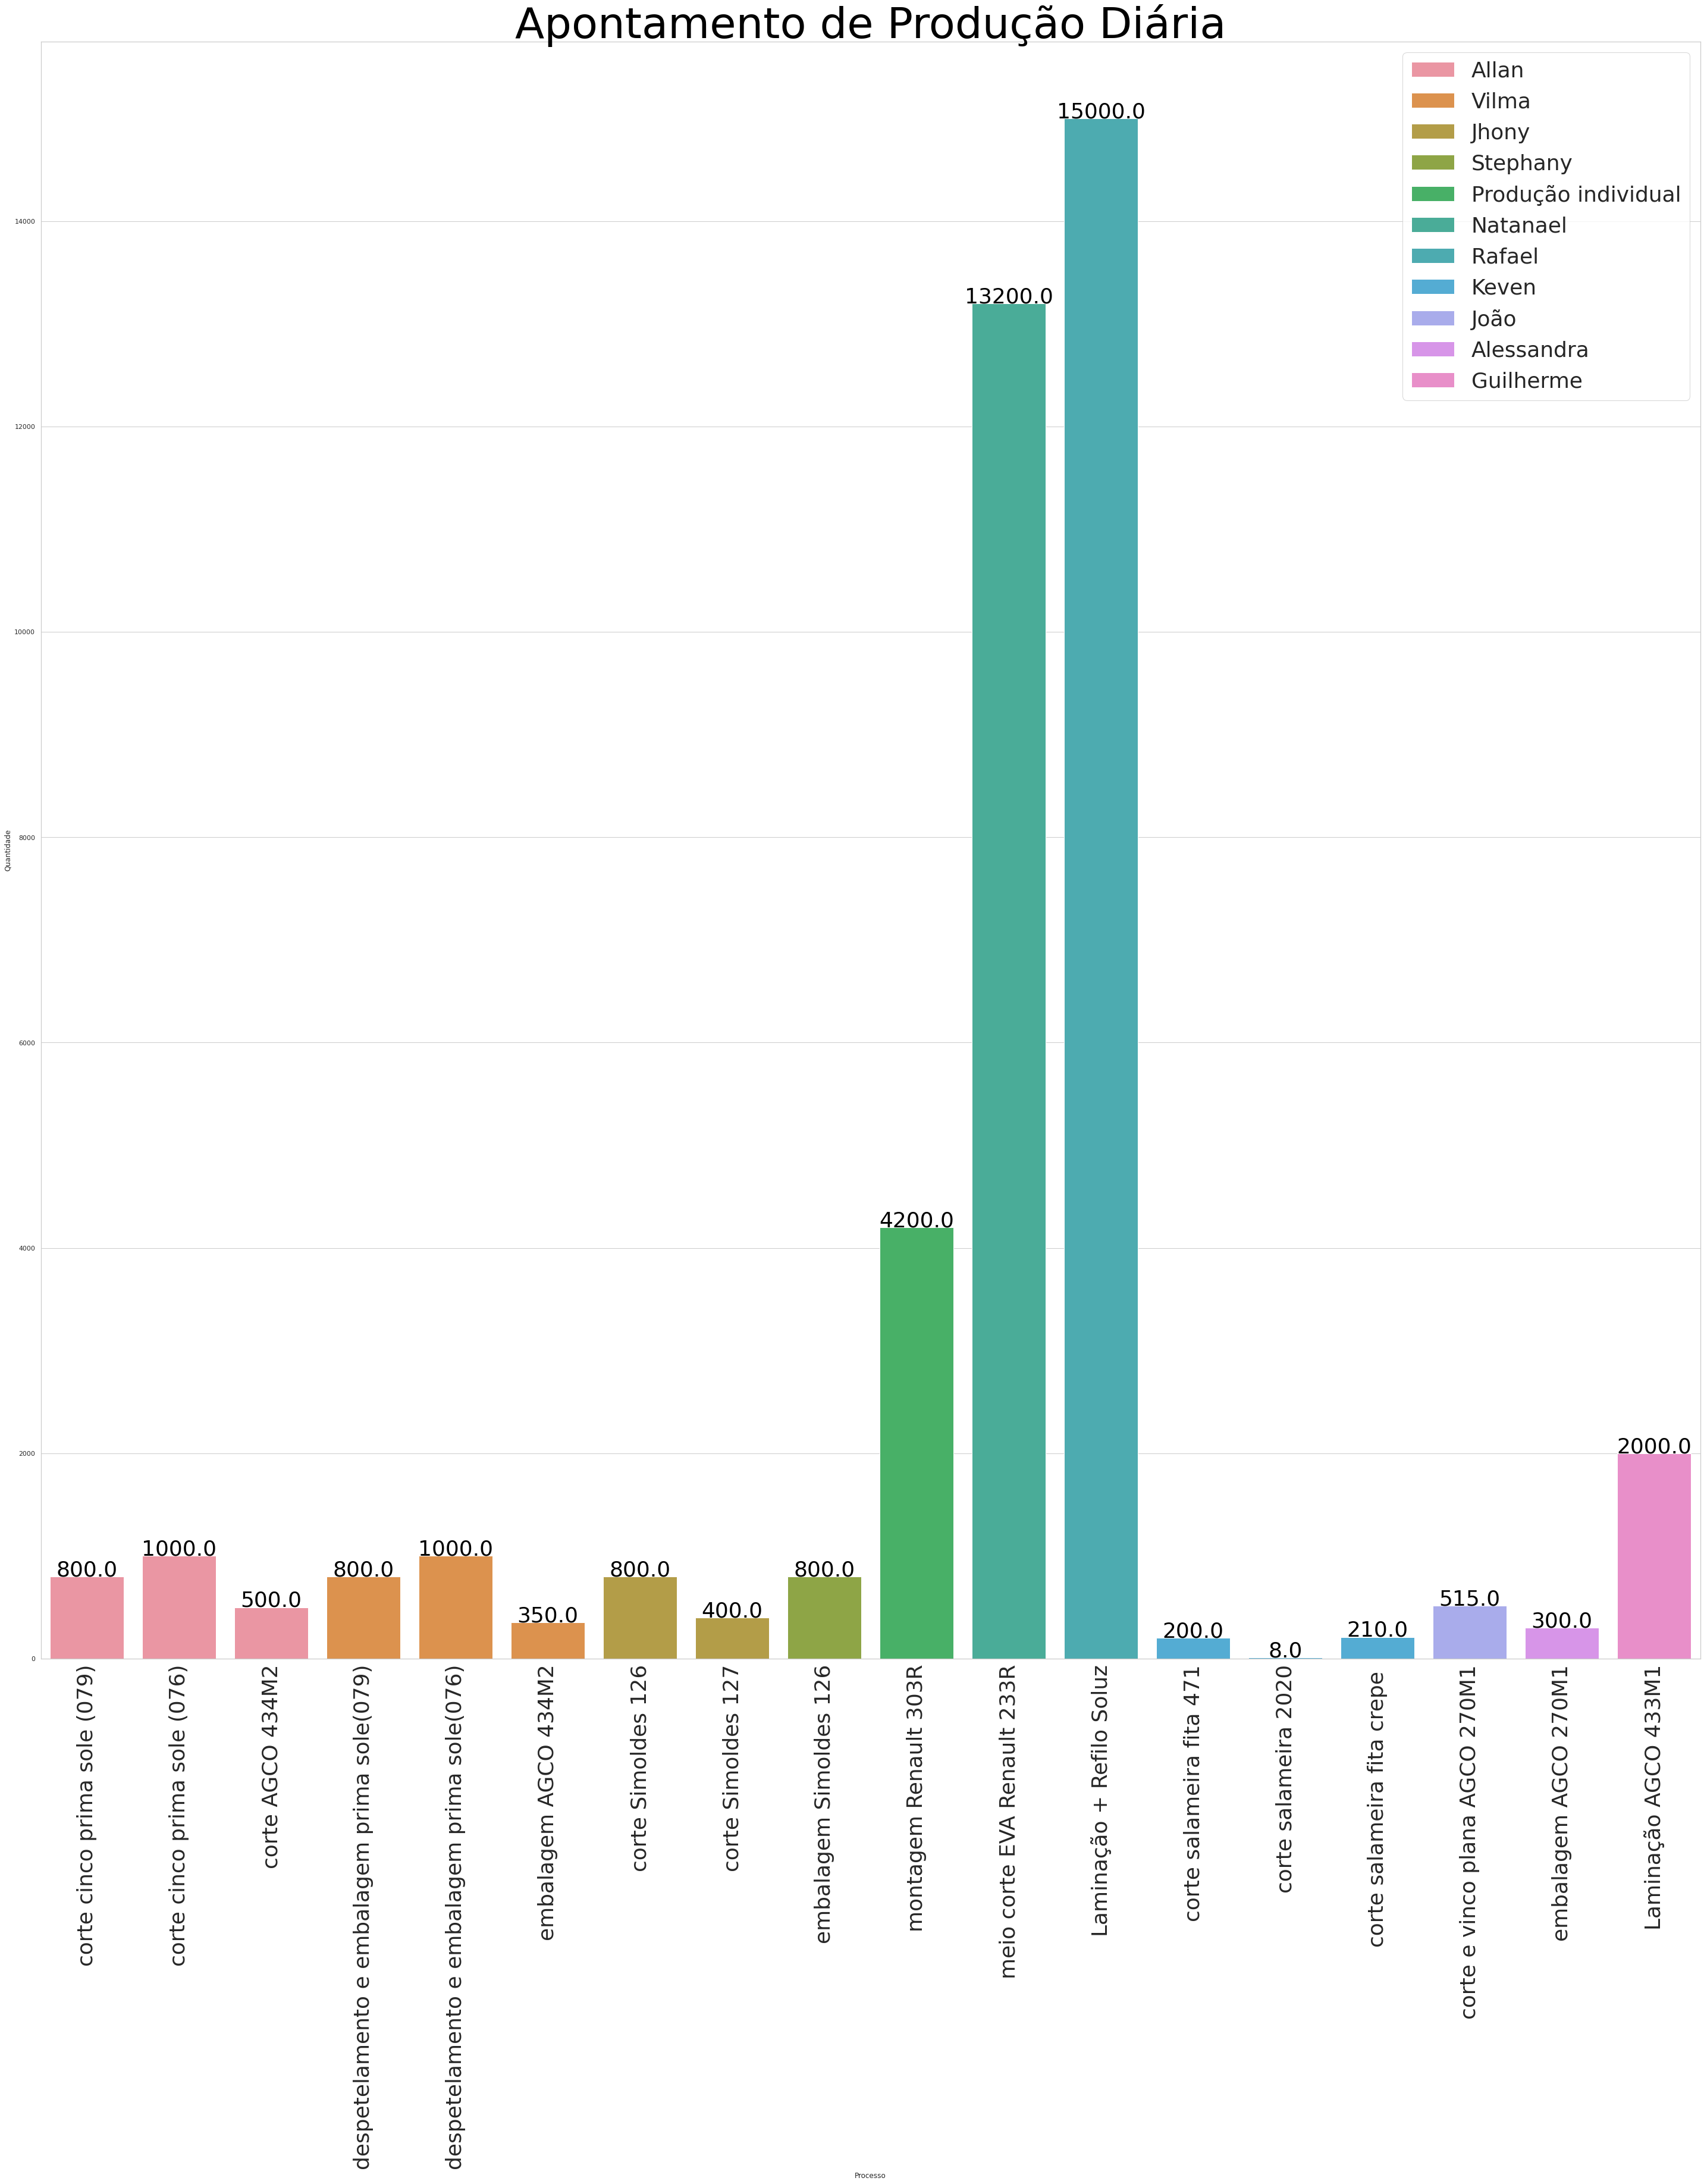

In [ ]:
import seaborn as sns
#import matplotlib.pyplot as plt
 

sns.set(rc={'figure.figsize':(50, 50)}) 
sns.set_theme(style='whitegrid')

plot = sns.barplot(hue='Responsável', x='Processo', y='Quantidade', dodge=False, data=tabela_produtividade)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, fontsize=36)
plot.set_title('Apontamento de Produção Diária', color='black',fontsize=72)
plot.legend(fontsize='36')

for i in plot.patches:
  plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='baseline', fontsize=36,
                color='black', xytext=(0,1),
                textcoords='offset pixels')

plot.get_figure().savefig('grafico.png')


#plt.show()
#processos = tabela_produtividade['Processo'].dropna().to_frame()
#quantidade = tabela_produtividade['Quantidade'].dropna().to_frame()
#processos.value_counts().index[:]
#quantidade.value_counts().plot.bar()
#tempo = horario_final - horario_inicial.to_frame()
#tempo = tempo.rename(columns={0: 'Tempo em processo'})
#tempo['Tempo em processo']

In [ ]:
tabela_produtividade_inidividual = tabela_meta[['Produção Individual', 'Realizado', 'Item']]
tabela_produtividade_inidividual = tabela_produtividade_inidividual.convert_dtypes()
tabela_produtividade_inidividual.dropna()
tabela_produtividade_inidividual.to_excel('producao_individual.xlsx', sheet_name='Produção Individual', na_rep=' ', header=True, index=False)


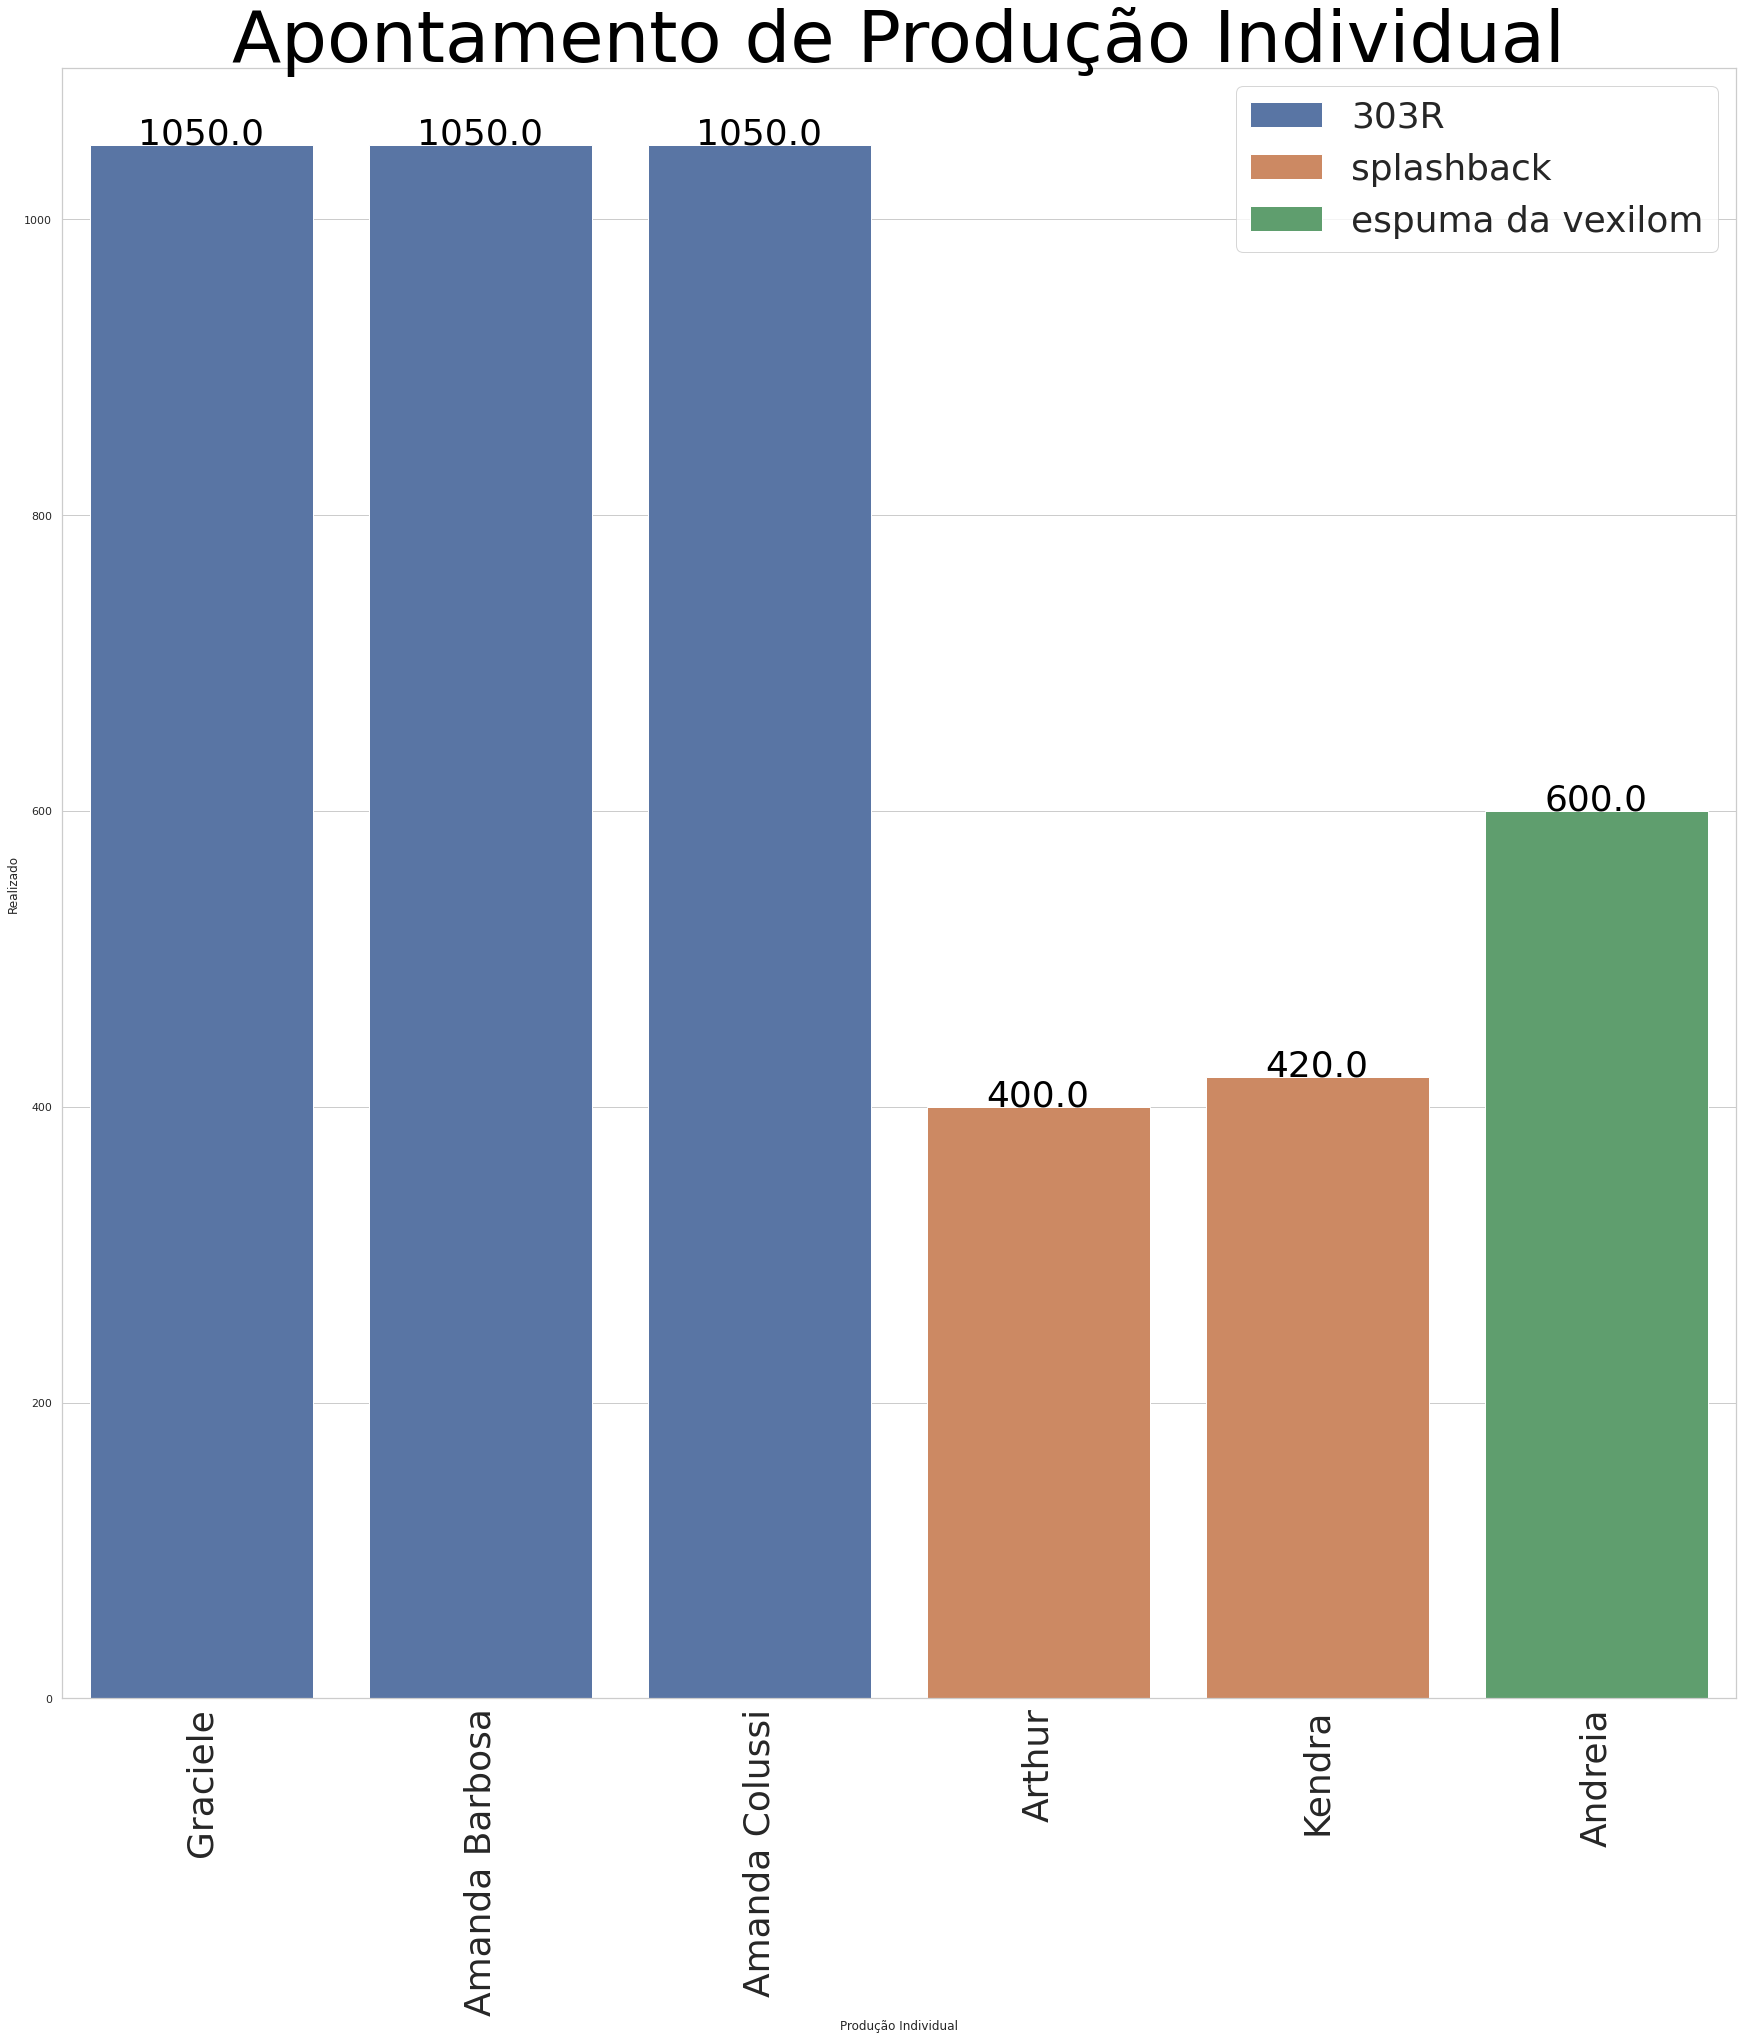

In [ ]:
sns.set(rc={'figure.figsize':(30, 30)}) 
sns.set_theme(style='whitegrid')

plot = sns.barplot(hue='Item', x='Produção Individual', y='Realizado', dodge=False,data=tabela_produtividade_inidividual)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, fontsize=36)
plot.legend(fontsize=36)
plot.set_title('Apontamento de Produção Individual', fontsize=72, color='black')

for i in plot.patches:
  plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='baseline', fontsize=36,
                color='black', xytext=(0,1),
                textcoords='offset pixels')
  
plot.get_figure().savefig('grafico_individual.png')

In [ ]:
def enviar_email():
  import smtplib,ssl
  import email.message
  from email.mime.multipart import MIMEMultipart
  from email.mime.base import MIMEBase
  from email.mime.text import MIMEText
  from email.mime.image import MIMEImage
  from email.utils import formatdate
  from email import encoders
  
  grafico =  'grafico.png'
  grafico_individual = 'grafico_individual.png'
  # Fazer antes (apenas na 1ª vez): Ativar Aplicativos não Seguros.
    # Gerenciar Conta Google -> Segurança -> Aplicativos não Seguros -> Habilitar
  # Caso mesmo assim dê o erro: smtplib.SMTPAuthenticationError: (534,
  # Você faz o login no seu e-mail e depois entra em: https://accounts.google.com/DisplayUnlockCaptcha
  
  server = smtplib.SMTP('smtp.gmail.com:587')
  
  msg = MIMEMultipart()
  msg['From'] = 'email de quem manda'
  msg['To'] = 'email de quem recebe'
  msg['Date'] = formatdate(localtime=True)
  msg['Subject'] = 'titulo do email'
  body = 'mensagem dentro do corpo do email'
  msg.attach(MIMEText(body))
 
  part = MIMEBase('application', 'vnd.ms-excel')
  part.set_payload(open('producao_diaria.xlsx', 'rb').read())
  encoders.encode_base64(part)
  part.add_header('Content-Disposition', 'attachment', filename='producao_diaria.xlsx')
  msg.attach(part)
 
  part2 = MIMEBase('application', 'vnd.ms-excel')
  part2.set_payload(open('producao_individual.xlsx', 'rb').read())
  encoders.encode_base64(part2)
  part2.add_header('Content-Disposition', 'attachment', filename='producao_individual.xlsx')
  msg.attach(part2)
 
  fp = open(grafico,'rb')
  img = MIMEImage(fp.read())
  fp.close()
  img.add_header('Content-ID', '<{}>'.format(grafico))
  msg.attach(img)
  
  fp2 = open(grafico_individual, 'rb')
  img2 = MIMEImage(fp2.read())
  fp2.close()
  img2.add_header('Content-ID', '<{}>'.format(grafico_individual))
  msg.attach(img2)
 
  smtp = smtplib.SMTP('smtp.gmail.com: 587')
  smtp.ehlo()
  smtp.starttls()
  smtp.login('seu login', 'sua senha')
  smtp.sendmail(msg['From'], msg['To'], msg.as_string())
  smtp.quit()
 
  
  print('email enviado')

In [ ]:
enviar_email()

email enviado


- Projeto finalizado 24/05/2021
- Funcional, com disposição para teste.